In [18]:
import numpy as np
import math as mp
from qutip import *
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
from numpy import diff
import random
from tqdm import tqdm

In [19]:
angle=np.pi/100
downstate = basis(2,1)*basis(2,1).dag()
upstate = basis(2,0)*basis(2,0).dag()
H = sigmax()
M1 = basis(2,0)*basis(2,0).dag()
M2 = basis(2,1)*basis(2,1).dag()

sequence = 100 #number of sequence
num = 1000 #number of measurements at each sequence
ssize = 1000 #sample size of theta

In [20]:
def func1(q, ini1, theta):
    evolve = np.cos(theta/2) * qeye(2) - 1j * np.sin(theta/2) * sigmax()
    estate = evolve * ini1 * evolve.dag()
    pointer= (1-q) * downstate+ (q) * upstate
    totalsys = tensor(estate, pointer)
    Uub = np.array([[1,0,0,0],[0,0,0,1],[0,1,0,0],[0,0,1,0]])
    Uub = Qobj(Uub, dims=[[2,2],[2,2]])
    fsys = Uub * totalsys * Uub.dag()
    f1 = fsys.ptrace(0)
    f2 = fsys.ptrace(1)
    return f1,f2


def func2(q, ini1, theta):
    evolve = np.cos(theta/2) * qeye(2) - 1j * np.sin(theta/2) * sigmax()
    estate = evolve * ini1 * evolve.dag()
    pointer= (1-q) * downstate+ (q) * upstate
    totalsys = tensor(estate, pointer)
    Uni = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
    Uni = Qobj(Uni, dims=[[2,2],[2,2]])
    fsys = Uni * totalsys * Uni.dag()
    f1 = fsys.ptrace(0)
    f2 = fsys.ptrace(1)
    return f1,f2

In [21]:
# IDEAL MEASUREMENT p=q=1
p = 1
ini = (1-p) * downstate+ (p) * upstate
q=1

gamma0 = np.zeros([sequence, 2])
Mstate=ini

for loop in tqdm(range(sequence)):
    Mstate,Pstate = func1(q,Mstate,angle)
    p1=(Pstate*M1).tr()
    p2=(Pstate*M2).tr()
    res = random.choices([0,1], weights=(p1,p2), k=num)
    N1= res.count(0)
    N2= res.count(1)
    N = N1 + N2
    gamma1 = N1/N
    gamma2 = N2/N
    gamma0[loop][0] = N1/N
    gamma0[loop][1] = N2/N

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 422.48it/s]


In [22]:
tvec = np.linspace(0, 0.1*np.pi, ssize)
prob = np.zeros([sequence, len(tvec), 2])
j = 0
for theta in tqdm(tvec):
    p = 1
    ini = (1-p) * downstate + (p) * upstate
    q=1
    Mstate=ini
    for loop in range(sequence):
        Mstate,Pstate=func1(q,Mstate,theta)
        p1=(Pstate*M1).tr()
        p2=(Pstate*M2).tr()
        prob[loop][j][0] = p1
        prob[loop][j][1] = p2
    j += 1

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:06<00:00,  4.06it/s]


In [23]:
evalue = np.zeros(sequence)
varid = np.zeros(sequence)
a = np.zeros([sequence, len(prob[0])])
for i in range(sequence):
    k = 0
    temp = -1000
    xmax = 0
    for l in prob[i]:
        #print(l,gammai[0])
        a[i][k] = a[i-1][k] - gamma0[i][0] * np.log(gamma0[i][0]/l[0]) - gamma0[i][1] * np.log(gamma0[i][1]/l[1])
        if a[i][k] > temp:
            temp = a[i][k]
            xmax = k
        k += 1
    evalue[i] = tvec[xmax]
    d1 = np.gradient((a[i]))/np.gradient(tvec)
    d2 = np.gradient(d1)/np.gradient(tvec)
    varid[i] = d2[xmax]

C:\Users\Muthumanimaran\AppData\Local\Temp\ipykernel_22312\838504332.py:10: RuntimeWarning: invalid value encountered in double_scalars
  a[i][k] = a[i-1][k] - gamma0[i][0] * np.log(gamma0[i][0]/l[0]) - gamma0[i][1] * np.log(gamma0[i][1]/l[1])
C:\Users\Muthumanimaran\AppData\Local\Temp\ipykernel_22312\838504332.py:10: RuntimeWarning: divide by zero encountered in log
  a[i][k] = a[i-1][k] - gamma0[i][0] * np.log(gamma0[i][0]/l[0]) - gamma0[i][1] * np.log(gamma0[i][1]/l[1])
C:\Users\Muthumanimaran\AppData\Local\Temp\ipykernel_22312\838504332.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  a[i][k] = a[i-1][k] - gamma0[i][0] * np.log(gamma0[i][0]/l[0]) - gamma0[i][1] * np.log(gamma0[i][1]/l[1])


In [24]:
# UNBIASED MEASUREMENT 
p = 0.9975
ini = (1-p) * downstate+ (p) * upstate
q=0.9975

gammaub = np.zeros([sequence, 2])

Mstate=ini
for loop in tqdm(range(sequence)):
    Mstate,Pstate=func1(q,Mstate,angle)
    p1=(Pstate*M1).tr()
    p2=(Pstate*M2).tr()
    res = random.choices([0,1], weights=(p1,p2), k=num)
    N1= res.count(0)
    N2= res.count(1)
    N = N1 + N2
    gammaub[loop][0] = N1/N
    gammaub[loop][1] = N2/N

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 422.49it/s]


In [25]:
tvec = np.linspace(0, 0.1*np.pi, ssize)
prob = np.zeros([sequence, len(tvec), 2])
j = 0
for theta in tqdm(tvec):
    p =  0.9975
    ini = (1-p) * downstate+ (p) * upstate
    q=  0.9975
    Mstate=ini
    for loop in range(sequence):
        Mstate,Pstate=func1(q,Mstate,theta)
        p1=(Pstate*M1).tr()
        p2=(Pstate*M2).tr()
        prob[loop][j][0] = p1
        prob[loop][j][1] = p2
    j += 1

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:02<00:00,  4.13it/s]


In [26]:
evalueusb = np.zeros(sequence)
a = np.zeros([sequence, len(prob[0])])
varunb = np.zeros(sequence)
for i in range(sequence):
    k = 0
    temp = -1000
    xmax = 0
    for l in prob[i]:
        #print(l,gammai[0])
        a[i][k] = a[i-1][k]- gammaub[i][0] * np.log(gammaub[i][0]/l[0]) - gammaub[i][1] * np.log(gammaub[i][1]/l[1])
        if a[i][k] > temp:
            temp = a[i][k]
            xmax = k
        k += 1
    evalueusb[i] = tvec[xmax]
    d1 = np.gradient((a[i]))/np.gradient(tvec)
    d2 = np.gradient(d1)/np.gradient(tvec)
    varunb[i] = d2[xmax]

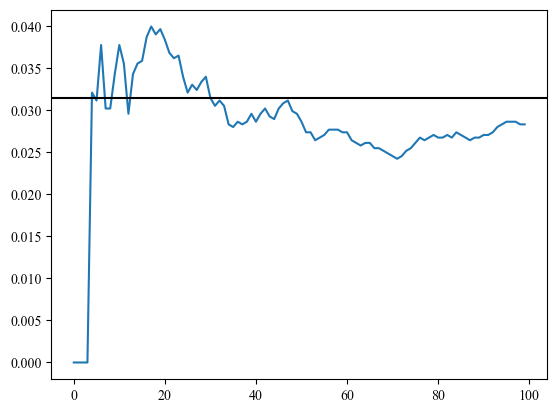

In [27]:
plt.plot(range(sequence), evalueusb)
plt.axhline(angle, color = 'black')

In [28]:
# NON-INVASIVE MEASUREMENT 
p = 0.9975
ini = (1-p) * downstate+ (p) * upstate
q=0.9975

gammani = np.zeros([sequence, 2])
Mstate=ini
for loop in tqdm(range(sequence)):
    Mstate,Pstate=func2(q,Mstate,angle)
    thetaeach=[]
    p1=(Pstate*M1).tr()
    p2=(Pstate*M2).tr()
    res = random.choices([0,1], weights=(p1,p2), k=num)
    N1= res.count(0)
    N2= res.count(1)
    N = N1 + N2
    gamma1 = N1/N
    gamma2 = N2/N
    gammani[loop][0] = N1/N
    gammani[loop][1] = N2/N

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 390.75it/s]


In [29]:
tvec = np.linspace(0, 0.1*np.pi, ssize)
prob = np.zeros([sequence, len(tvec), 2])
j = 0
for theta in tqdm(tvec):
    p =  0.9975
    ini = (1-p) * downstate+ (p) * upstate
    q=  0.9975
    Mstate=ini
    for loop in range(sequence):
        Mstate,Pstate=func2(q,Mstate,theta)
        p1=(Pstate*M1).tr()
        p2=(Pstate*M2).tr()
        prob[loop][j][0] = p1
        prob[loop][j][1] = p2
    j += 1

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:03<00:00,  4.10it/s]


In [30]:
evalueni = np.zeros(sequence)
varni = np.zeros(sequence)
a = np.zeros([sequence, len(prob[0])])
for i in range(sequence):
    k = 0
    temp = -1000
    xmax = 0
    for l in prob[i]:
        #print(l,gammai[0])
        a[i][k] = a[i-1][k]- gammani[i][0] * np.log(gammani[i][0]/l[0]) - gammani[i][1] * np.log(gammani[i][1]/l[1])
        if a[i][k] > temp:
            temp = a[i][k]
            xmax = k
        k += 1
    evalueni[i] = tvec[xmax]
    d1 = np.gradient((a[i]))/np.gradient(tvec)
    d2 = np.gradient(d1)/np.gradient(tvec)
    varni[i] = d2[xmax]

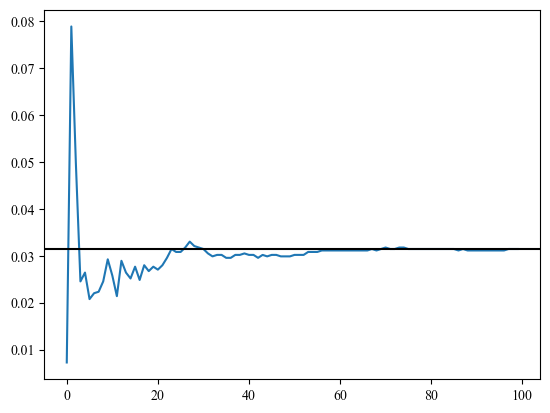

In [31]:
plt.plot(range(sequence), evalueni)
plt.axhline(angle, color = 'black')

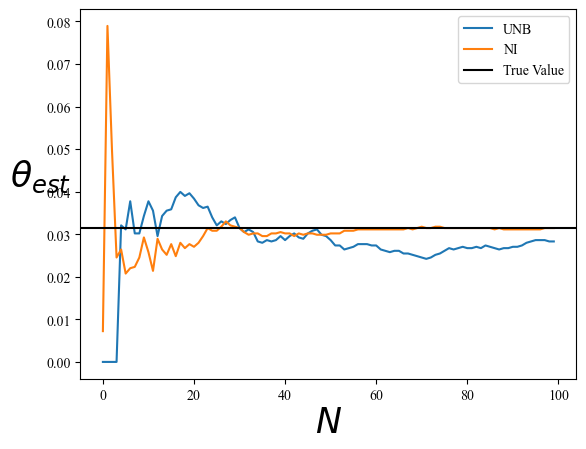

In [35]:
fig1 = plt.figure()
#plt.plot(range(sequence), evalue, label = "IDEAL")
plt.plot(range(sequence), evalueusb, label = "UNB")
plt.plot(range(sequence), evalueni, label = "NI")
plt.axhline(angle, color = 'black', label = "True Value")
plt.ylabel(r'$\theta_{est}$', rotation ='0', fontsize = 25)
plt.xlabel('$N$', fontsize = 25)
plt.legend()
plt.show()

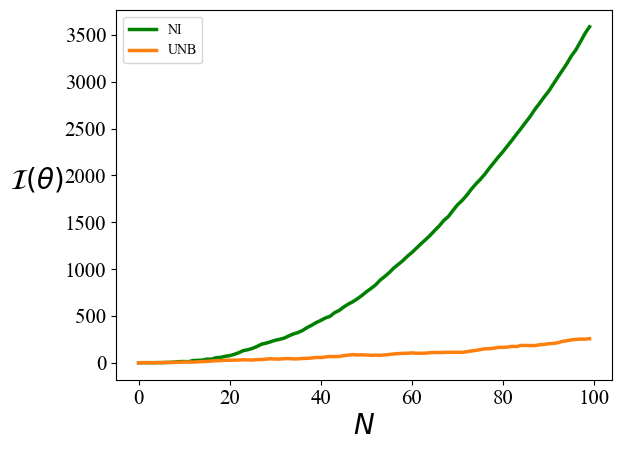

In [37]:
devni = (-varni)
devub = (-varunb)
devid = (-varid)
fig1 = plt.figure()
#plt.plot(range(sequence), devid, label = "IDEAL", linewidth = 2.)
plt.plot(range(sequence), devni, label = "NI", linewidth = 2.5, color ='g')
plt.plot(range(sequence), devub, label = "UNB", linewidth = 2.5, color ='#ff7f0e')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.ylabel(r'$\mathcal{I}(\theta)$', fontsize = 20, rotation = '0', labelpad = 20, fontstyle = 'italic')
plt.xlabel('$N$', fontsize = 20, fontstyle = 'italic')
plt.savefig('MLE.png', bbox_inches='tight')